In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from matplotlib import pyplot as plt
from IPython.display import Image
import cv2
from tqdm.notebook import tqdm as tqdm
import pandas as pd
import cv2

from imutils import build_montages
import numpy as np


# Creating New Folder

In [2]:
mkdir data

mkdir: cannot create directory ‘data’: File exists


# Genarated the annotation files, write a function to plot bounding boxes on the images using those text files.

In [3]:
def image(data):
    Image_path = "/home/nitin/Desktop/project/Images/"+data
    Annotations_path = "/home/nitin/Desktop/project/Annotations/"+data+".txt"
    Image_text = []
    img_label = []
    Annot_file =  open(Annotations_path)
    Image = cv2.imread(Image_path)
   
 
    for j in Annot_file:
        Image_text.append(j)
        
    count = int(Image_text[0].strip()) 

    for k in range(1,count+1):
        A = str(Image_text[k])
        A = A.strip()
        classes = A.split(' ')[0]
        img_label.append(classes)
        X_min = int(A.split(' ')[1])
        Y_min = int(A.split(' ')[2])
        X_max = int(A.split(' ')[3])
        Y_max = int(A.split(' ')[4])
        cv2.rectangle(Image,(X_min,Y_min),(X_max,Y_max),(0,255,0),1) 
    cv2.imwrite('/home/nitin/Desktop/project/data/'+data, Image)
    
    
os.chdir("/home/nitin/Desktop/project/Images/")
for data in glob.glob("*.jpg"):
    try:
        image(data)
    except:
        continue

# 2. Dataset Exploration

Find number of classes and their names in the dataset.


Find number of images per class and plot a graph.


Find number of annotations per class and plot a graph.


Plot a line graph for height and width of the images.


Any other way to explore (optional).


Note:- Try to be creative with the graphs

In [4]:
cn = 0
Img_Name = []
number_of_object = []
classes=[]
a = []
b = []
c = []
d = []
e = []
os.chdir("/home/nitin/Desktop/project/Annotations/")
for file in tqdm(glob.glob("*.txt")):
    Image_text = []
    Img_Name.append(file)
    cn = cn+1
    Annotations = open('/home/nitin/Desktop/project/Annotations/'+file)
    for x in Annotations: # to convert file io to list
        Image_text.append(x)
    Number = int(Image_text[0].strip())
    Temp_Labels = []
    number_of_object.append(Number)
    for p in range(1,Number+1):
        w = str(Image_text[p])
        w = w.strip()
        Temp_Labels.append(int(w.split(' ')[0]))
        classes.append(int(w.split(' ')[0]))
  
        a.append(Temp_Labels.count(1))
        b.append(Temp_Labels.count(2))
        c.append(Temp_Labels.count(3))
        d.append(Temp_Labels.count(4))
        e.append(Temp_Labels.count(5))

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

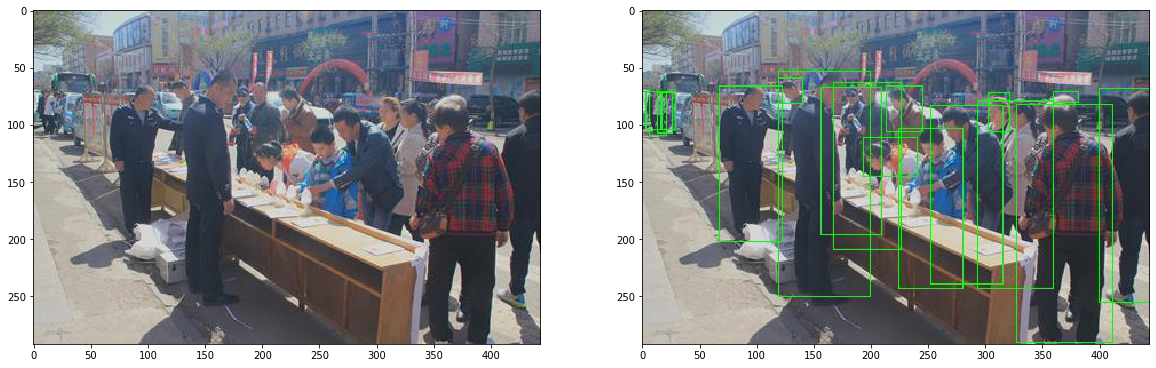

In [6]:
img1 = mpimg.imread('/home/nitin/Desktop/project/Images/000050.jpg')
img2 = mpimg.imread('/home/nitin/Desktop/project/data/000050.jpg')
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)

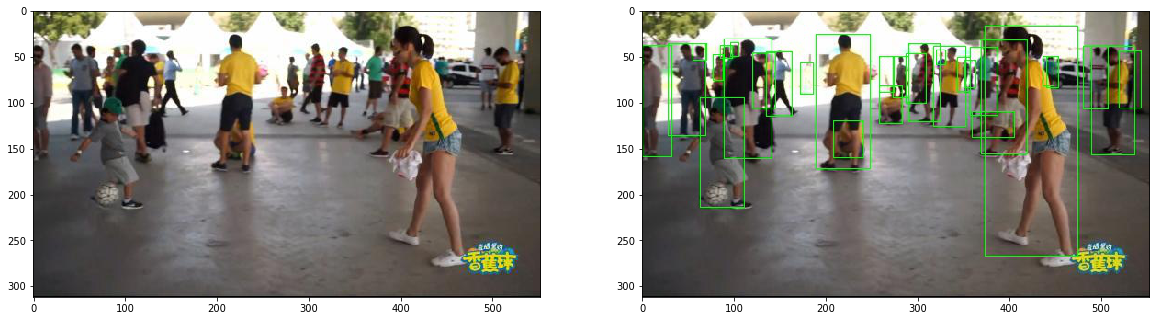

In [7]:
img1 = mpimg.imread('/home/nitin/Desktop/project/Images/000060.jpg')
img2 = mpimg.imread('/home/nitin/Desktop/project/data/000060.jpg')
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)

In [8]:
All_Classes = pd.Series(classes).replace({1:'Class1',
                                            2:'Class2',
                                            3:'Class3',
                                            4:'Class4',
                                            5:'Class5'})

All_Classes

0         Class1
1         Class1
2         Class1
3         Class1
4         Class1
           ...  
273470    Class3
273471    Class3
273472    Class5
273473    Class5
273474    Class5
Length: 273475, dtype: object

In [9]:
Imagecountperclass={'class1':len(a)-a.count(0),
                    'class2':len(b)-b.count(0),
                    'class3':len(c)-c.count(0),
                    'class4':len(d)-d.count(0),
                    'class5':len(e)-e.count(0)}

print('Number of Classes:',len(All_Classes.value_counts()))
print('classes:',list(All_Classes.value_counts().index))
print('Images per class:',Imagecountperclass)
print('Annotation per class:',dict(All_Classes.value_counts()))

Number of Classes: 5
classes: ['Class1', 'Class3', 'Class5', 'Class4', 'Class2']
Images per class: {'class1': 272945, 'class2': 4322, 'class3': 89712, 'class4': 4722, 'class5': 9640}
Annotation per class: {'Class1': 178593, 'Class3': 79934, 'Class5': 9640, 'Class4': 3649, 'Class2': 1659}


In [10]:
## Temporory dataframe
data1 = pd.DataFrame()
data1['Imagename'] = Img_Name
data1['no_of_obj'] = number_of_object
data1.tail()

,Imagename,no_of_obj
8995,005991.jpg.txt,15
8996,008751.jpg.txt,36
8997,014420.jpg.txt,21
8998,004967.jpg.txt,26
8999,007369.jpg.txt,30


In [11]:
data2 = pd.DataFrame()
data2['no_of_pedestrians'] = a
data2['no_of_riders'] = b
data2['no_of_partially-visible persons'] = c
data2['no_of_ignore regions'] = d
data2['no_of_crowd'] = e
data2.tail()

,no_of_pedestrians,no_of_riders,no_of_partially-visible persons,no_of_ignore regions,no_of_crowd
273470,22,0,4,0,0
273471,22,0,5,0,0
273472,22,0,5,0,1
273473,22,0,5,0,2
273474,22,0,5,0,3


In [12]:
data = pd.concat([data1,data2],axis=1)
data.head()

,Imagename,no_of_obj,no_of_pedestrians,no_of_riders,no_of_partially-visible persons,no_of_ignore regions,no_of_crowd
0,016621.jpg.txt,21.0,1,0,0,0,0
1,006458.jpg.txt,20.0,2,0,0,0,0
2,015281.jpg.txt,15.0,3,0,0,0,0
3,005353.jpg.txt,16.0,4,0,0,0,0
4,007134.jpg.txt,37.0,5,0,0,0,0


In [13]:
import seaborn as sns
sns.set_style('whitegrid')

Text(0.5, 0, 'Classes')

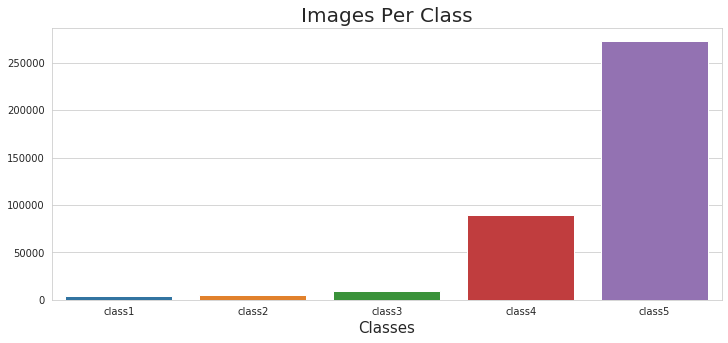

In [14]:
plt.figure(figsize=(12,5))
sns.barplot(y=np.sort(list(Imagecountperclass.values())),x=list(Imagecountperclass.keys()))
plt.title('Images Per Class',size=20)
plt.xlabel('Classes',size=15)

Text(0.5, 1.0, 'Annotations Per Class')

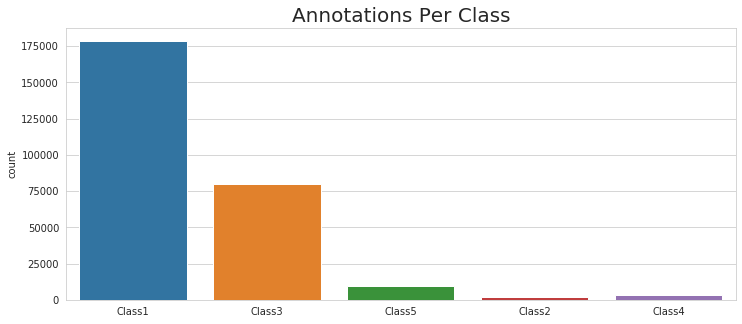

In [15]:

plt.figure(figsize=(12,5))
sns.countplot(All_Classes)
plt.title('Annotations Per Class',size=20)

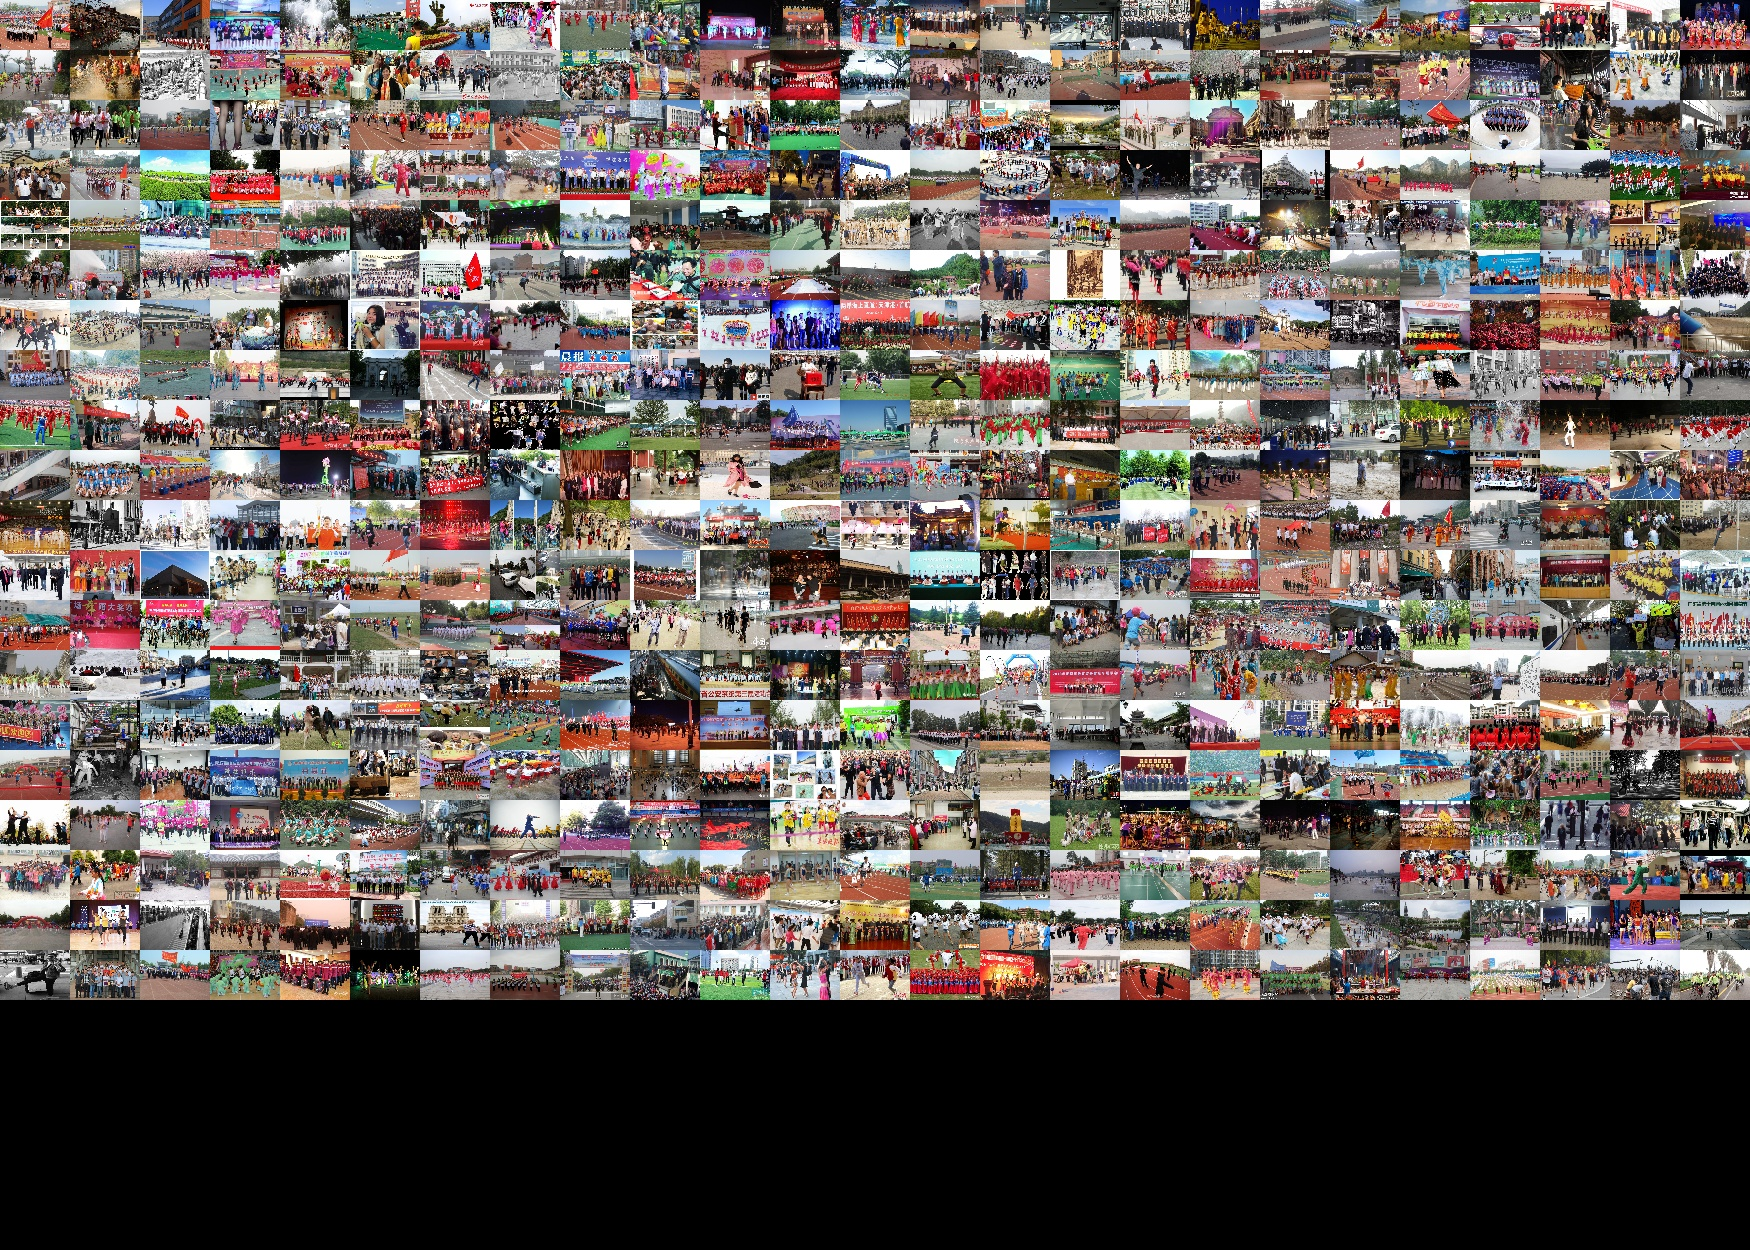

In [16]:
images = []
os.chdir("/home/nitin/Desktop/project/Images/")
for file in glob.glob("*.jpg"):
    images.append(str('/home/nitin/Desktop/project/Images/'+file))
    
    
images1 = list(pd.Series(images).sample(500))

import cv2

from imutils import build_montages
import numpy as np

images = []
for imagePath in images1:
	image = cv2.imread(imagePath)
	images.append(image)
montages = build_montages(images, (70, 50), (25, 25))

cv2.imwrite('gallery.jpg',np.squeeze(montages))

Image('gallery.jpg')